In [21]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import joblib

In [33]:
model = joblib.load('pipeline2.pkl')

In [34]:
df = pd.read_csv('MergedData.csv')
df = df.drop('Unnamed: 0',axis=1)

In [35]:
att = np.load('imp_attributes.npy',allow_pickle=True)

In [36]:
df = df[att]

In [37]:
df.head()

,zip,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment_pct_chg,...,median_year_structure_built,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,77072,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,0.051118,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
1,77072,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,0.000846,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
2,77072,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,0.007721,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
3,77072,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,0.022941,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
4,77072,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,0.028646,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0


In [38]:
label_data = df[~(df['Liking'].isnull())]
unlabel_data  = df[df['Liking'].isnull()]
for i in label_data:
    if label_data[i].nunique()<2:
        label_data = label_data.drop(i,axis=1)
print(label_data.shape)
label_data.head()

(1488, 42)


,zip,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment_pct_chg,...,median_year_structure_built,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,77072,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,0.051118,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
1,77072,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,0.000846,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
2,77072,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,0.007721,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
3,77072,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,0.022941,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
4,77072,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,0.028646,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0


In [39]:
data = label_data.drop('Liking',axis=1)
target = label_data['Liking']

<AxesSubplot:>

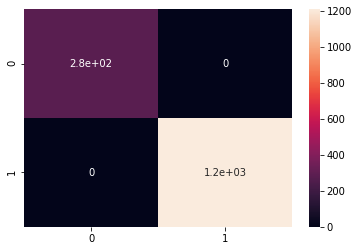

In [40]:
y_pred = model.predict(data)
sns.heatmap(confusion_matrix(target,y_pred),annot=True)

In [41]:
len(model[1].coef_[0])

42

In [43]:
pd.DataFrame([model[1].coef_[0],data.columns]).T

,0,1
0,-0.64211,zip
1,0.150997,number_of_properties
2,-0.022511,year
3,0.133463,period
4,-0.016916,completions
5,0.012978,vac_pct
6,0.109841,asking_rent_pct_chg
7,-0.009351,abs_per_occ_stk_pct
8,-0.00914,construction_per_absorption
9,-0.00307,total_employment_pct_chg
